In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


2025-04-16 18:14:53.313381: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744827293.776227      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744827293.923537      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load images
data = []
labels = []
IMG_SIZE = 224  # For VGG19 compatibility

for category in ["yes", "no"]:
    path = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/" + category
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        if img_array is not None:
            img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append(img_array)
            labels.append(1 if category == "yes" else 0)


In [3]:
print(img_array)

[[[224 224 224]
  [210 210 210]
  [202 202 202]
  ...
  [203 203 203]
  [247 247 247]
  [255 255 255]]

 [[ 37  37  37]
  [ 23  23  23]
  [ 15  15  15]
  ...
  [ 28  28  28]
  [203 203 203]
  [254 254 254]]

 [[ 18  18  18]
  [  4   4   4]
  [  0   0   0]
  ...
  [  2   2   2]
  [214 214 214]
  [253 253 253]]

 ...

 [[ 23  23  23]
  [  3   3   3]
  [  0   0   0]
  ...
  [  8   8   8]
  [214 214 214]
  [249 249 249]]

 [[ 32  32  32]
  [  8   8   8]
  [  1   1   1]
  ...
  [ 15  15  15]
  [215 215 215]
  [249 249 249]]

 [[ 50  50  50]
  [ 23  23  23]
  [ 11  11  11]
  ...
  [ 23  23  23]
  [214 214 214]
  [249 249 249]]]


In [4]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
data = np.array(data)
labels = np.array(labels)

# Preprocess for VGG19
data = preprocess_input(data)
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

In [6]:
# Normalize data
data = data / 255.0  # Already resized to 224x224

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [7]:
print(x_train, x_test, y_train, y_test)

[[[[-0.40760392 -0.45795685 -0.4850196 ]
   [-0.40760392 -0.45795685 -0.4850196 ]
   [-0.40760392 -0.45795685 -0.4850196 ]
   ...
   [-0.40760392 -0.45795685 -0.4850196 ]
   [-0.40760392 -0.45795685 -0.4850196 ]
   [-0.40760392 -0.45795685 -0.4850196 ]]

  [[-0.40760392 -0.45795685 -0.4850196 ]
   [-0.40760392 -0.45795685 -0.4850196 ]
   [-0.40760392 -0.45795685 -0.4850196 ]
   ...
   [-0.40760392 -0.45795685 -0.4850196 ]
   [-0.40760392 -0.45795685 -0.4850196 ]
   [-0.40760392 -0.45795685 -0.4850196 ]]

  [[-0.40760392 -0.45795685 -0.4850196 ]
   [-0.40760392 -0.45795685 -0.4850196 ]
   [-0.40760392 -0.45795685 -0.4850196 ]
   ...
   [-0.40760392 -0.45795685 -0.4850196 ]
   [-0.40760392 -0.45795685 -0.4850196 ]
   [-0.40760392 -0.45795685 -0.4850196 ]]

  ...

  [[-0.40760392 -0.45795685 -0.4850196 ]
   [-0.40760392 -0.45795685 -0.4850196 ]
   [-0.40760392 -0.45795685 -0.4850196 ]
   ...
   [-0.40760392 -0.45795685 -0.4850196 ]
   [-0.40760392 -0.45795685 -0.4850196 ]
   [-0.40760392 

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()

# Train
cnn_history = cnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1744827317.454411      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1744827317.455055      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      11,944,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,963,457 (45.64 MB)

 Trainable params: 11,963,457 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


I0000 00:00:1744827321.749623      63 service.cc:148] XLA service 0x7ebfd0014100 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744827321.751230      63 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1744827321.751259      63 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1744827322.108115      63 cuda_dnn.cc:529] Loaded cuDNN version 90300


5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5749 - loss: 0.9532

I0000 00:00:1744827327.041380      63 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 721ms/step - accuracy: 0.6015 - loss: 0.9382 - val_accuracy: 0.7843 - val_loss: 0.5206
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8258 - loss: 0.4378 - val_accuracy: 0.8235 - val_loss: 0.4526
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8506 - loss: 0.3149 - val_accuracy: 0.8431 - val_loss: 0.5768
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8939 - loss: 0.2695 - val_accuracy: 0.8627 - val_loss: 0.4162
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9626 - loss: 0.1570 - val_accuracy: 0.8235 - val_loss: 0.7824
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9666 - loss: 0.1033 - val_accuracy: 0.8627 - val_loss: 0.6579
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9945 - loss: 0.0325 - val_accuracy: 0.8431 - val_loss: 0.8784
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9931 - loss: 0.0212 - val_accuracy: 0.8627 - val_loss: 0.8187
Epoch 9/1

In [9]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Load pre-trained VGG19
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze base layers

# Build custom head
vgg_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

vgg_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
vgg_model.summary()

# Train
vgg_history = vgg_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 7, 7, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,090,177 (76.64 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.4990 - loss: 0.7302 - val_accuracy: 0.5294 - val_loss: 0.6982
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step - accuracy: 0.5146 - loss: 0.7109 - val_accuracy: 0.5294 - val_loss: 0.7043
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - accuracy: 0.6231 - loss: 0.6644 - val_accuracy: 0.5294 - val_loss: 0.7218
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 234ms/step - accuracy: 0.6370 - loss: 0.6816 - val_accuracy: 0.5294 - val_loss: 0.7236
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - accuracy: 0.6203 - loss: 0.6688 - val_accuracy: 0.5294 - val_loss: 0.7146
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - accuracy: 0.5938 - loss: 0.6926 - val_accuracy: 0.5294 - val_loss: 0.7046
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 234ms/step - accuracy: 0.6056 - loss: 0.6815 - val_accuracy: 0.5294 - val_loss: 0.6945
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - accuracy: 0.6376 - loss: 0.6363 - val_accuracy: 0.5294 - val_loss: 0

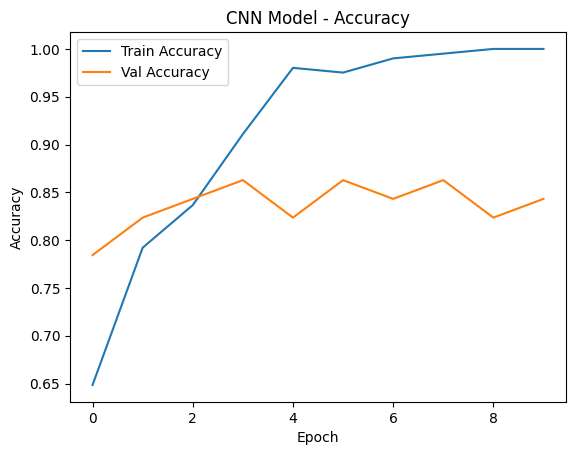

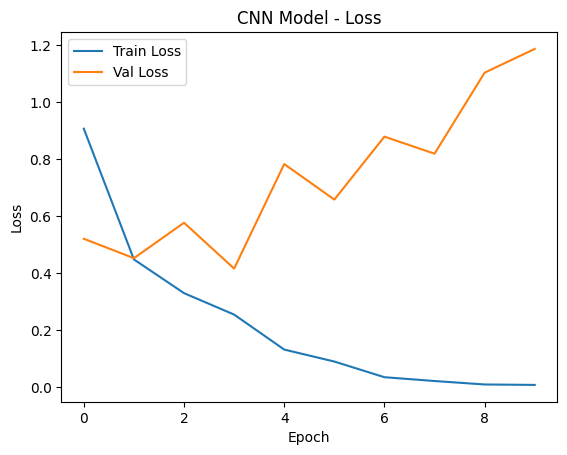

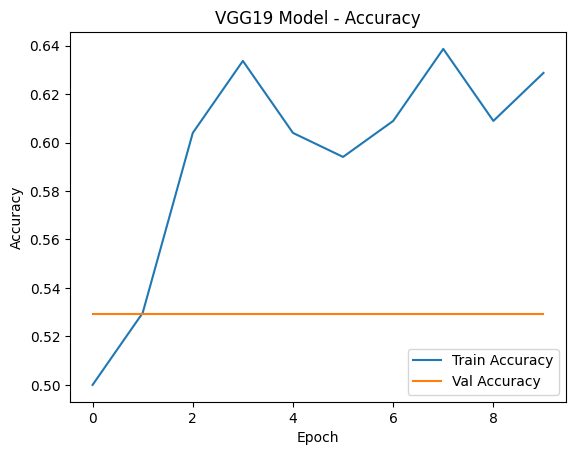

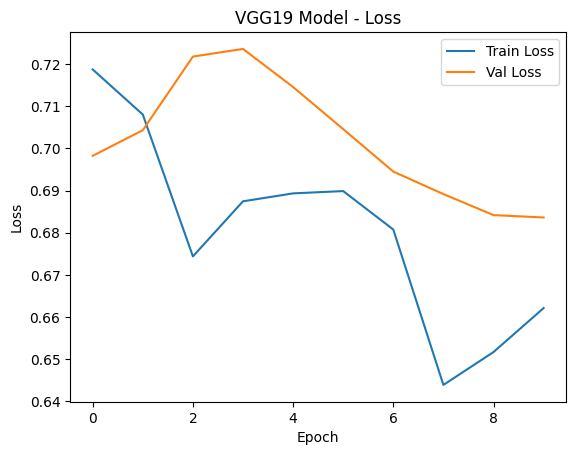

In [10]:
import matplotlib.pyplot as plt

def plot_training(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training(cnn_history, "CNN Model")
plot_training(vgg_history, "VGG19 Model")


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test set
cnn_preds = (cnn_model.predict(x_test) > 0.5).astype("int32")
vgg_preds = (vgg_model.predict(x_test) > 0.5).astype("int32")

print("CNN Classification Report:")
print(classification_report(y_test, cnn_preds))

print("VGG19 Classification Report:")
print(classification_report(y_test, vgg_preds))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step
CNN Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.81      0.93      0.86        27

    accuracy                           0.84        51
   macro avg       0.85      0.84      0.84        51
weighted avg       0.85      0.84      0.84        51

VGG19 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.53      1.00      0.69        27

    accuracy                           0.53        51
   macro avg       0.26      0.50      0.35        51
weighted avg       0.28      0.53      0.37        51



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
# Evaluate the model's accuracy on the test set
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")


2/2 - 0s - 22ms/step - accuracy: 0.8431 - loss: 1.1857
Test accuracy: 0.84


In [13]:
# Make predictions on the test set
predictions = cnn_model.predict(x_test)

# Convert the predicted probabilities to class labels (1 or 0)
predicted_labels = (predictions > 0.5).astype(int)  # 1 for tumor, 0 for no tumor


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


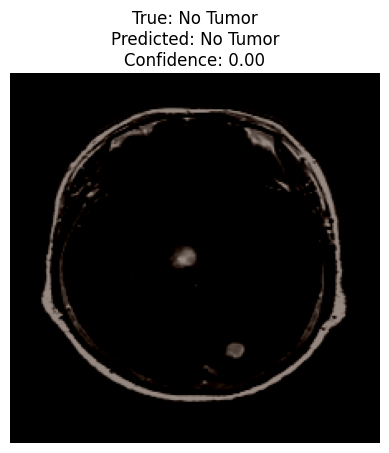

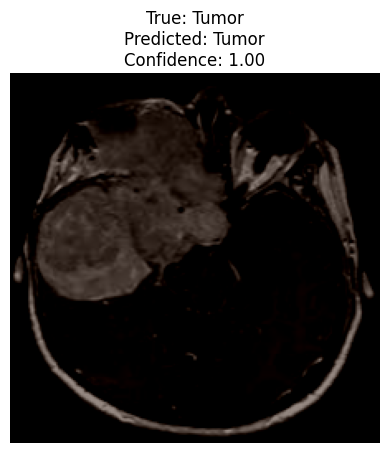

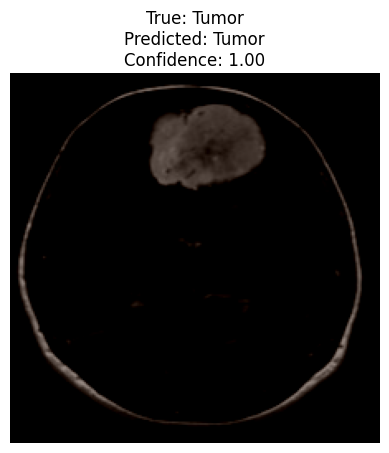

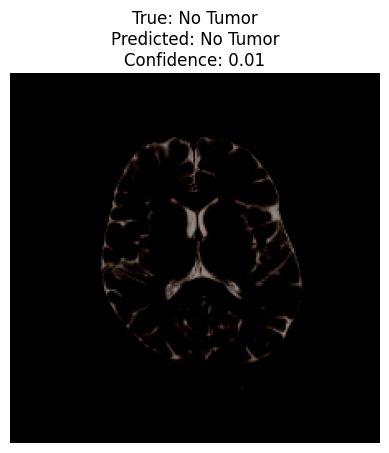

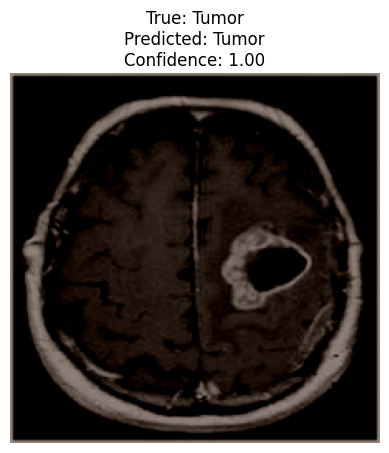

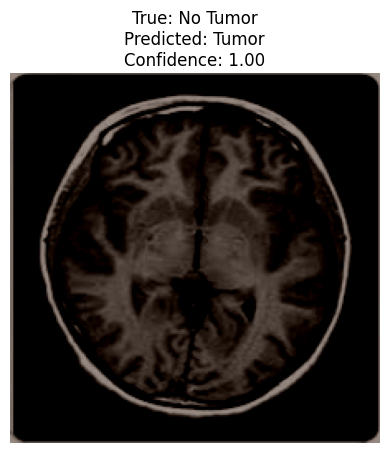

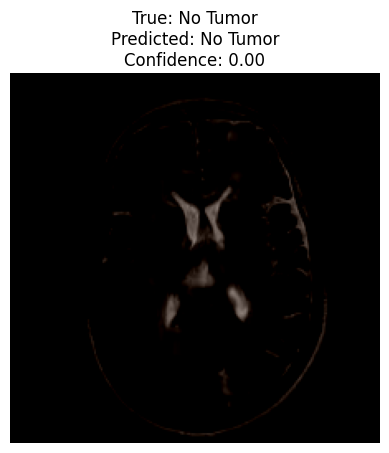

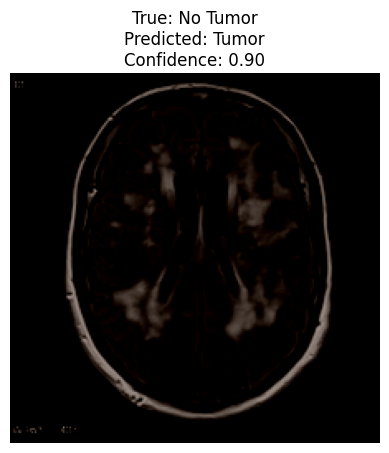

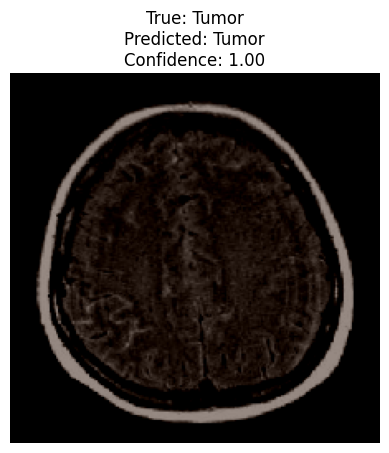

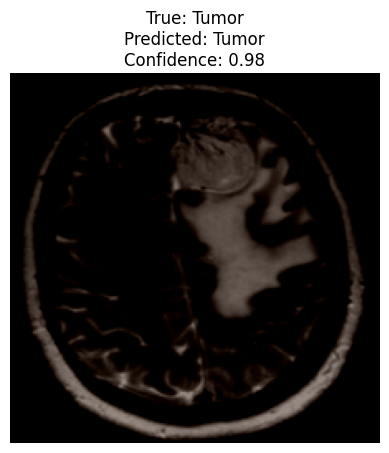

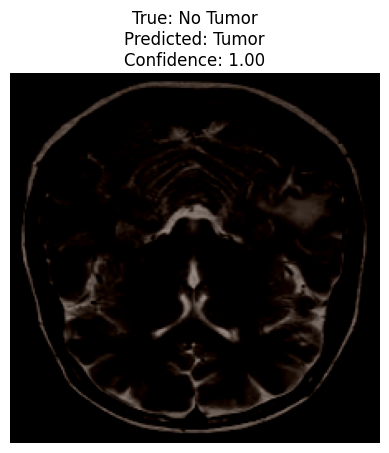

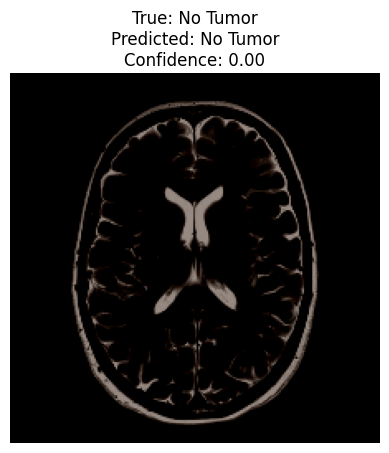

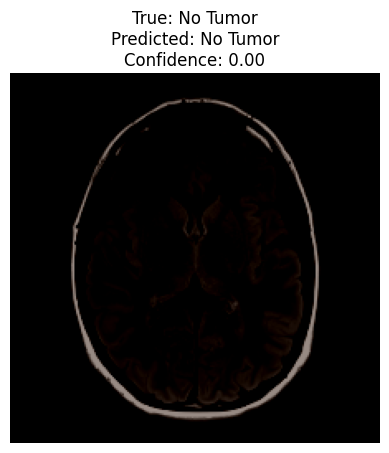

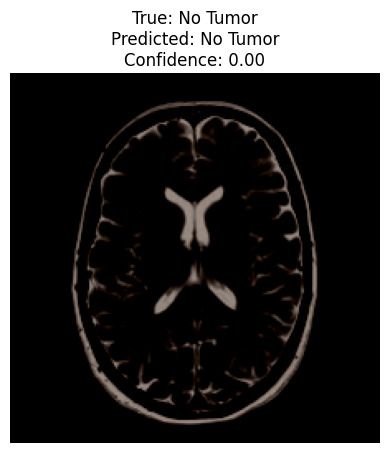

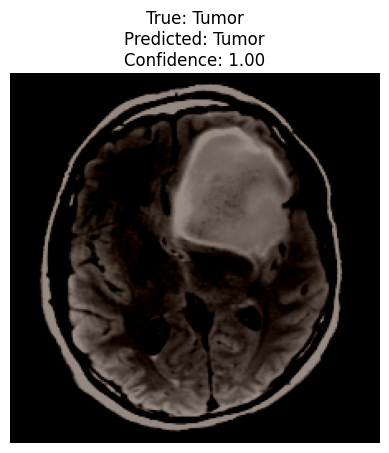

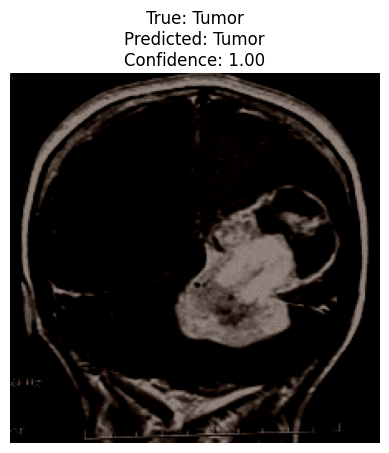

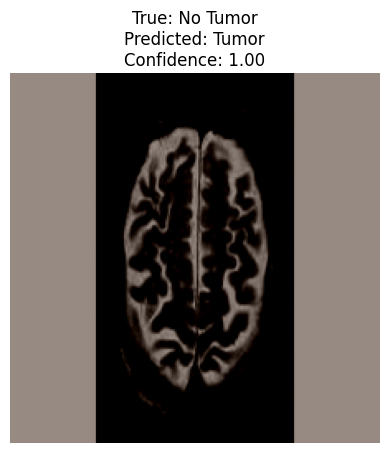

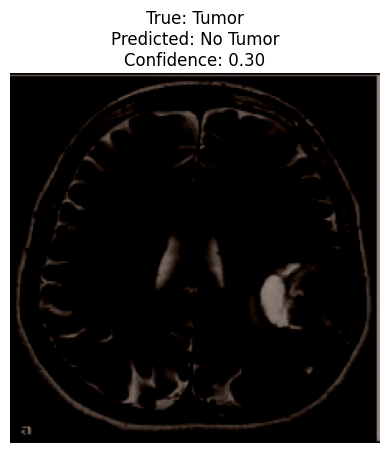

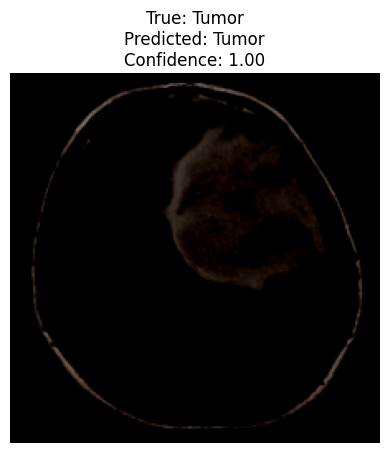

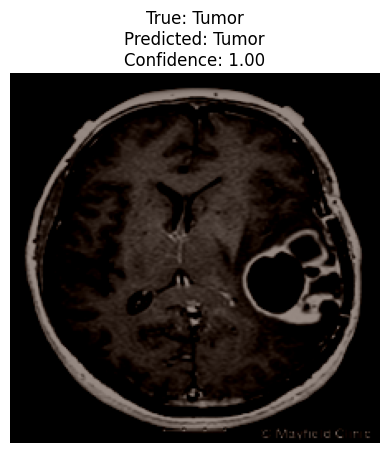

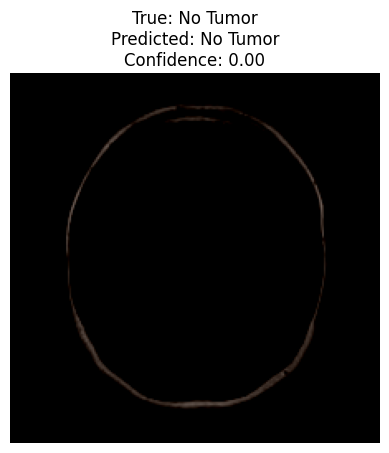

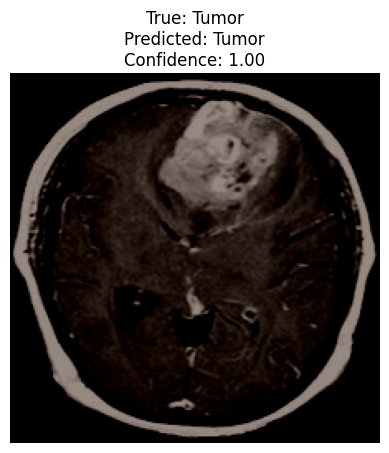

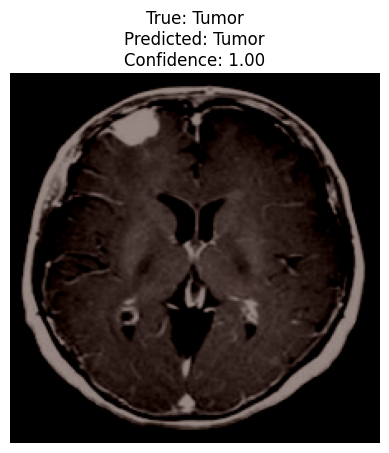

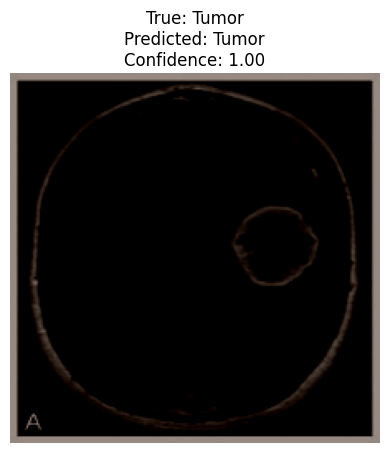

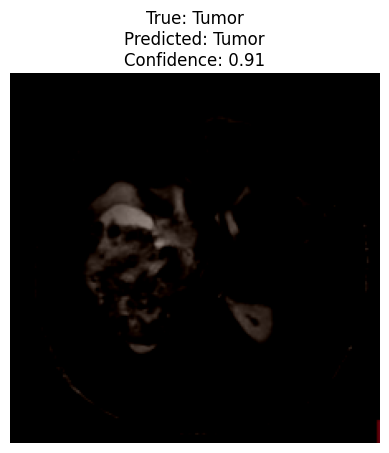

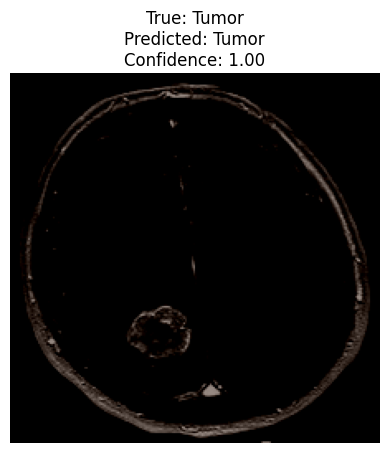

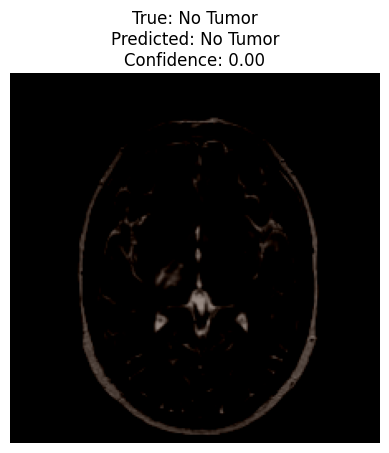

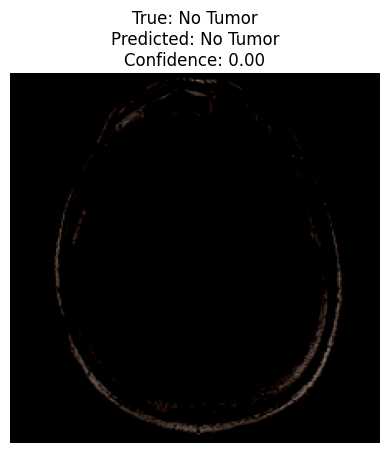

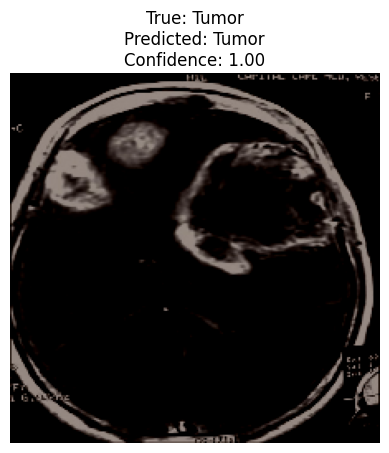

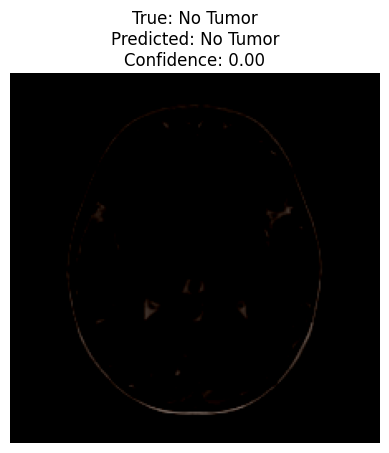

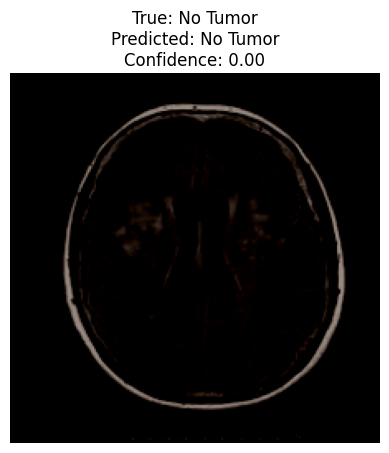

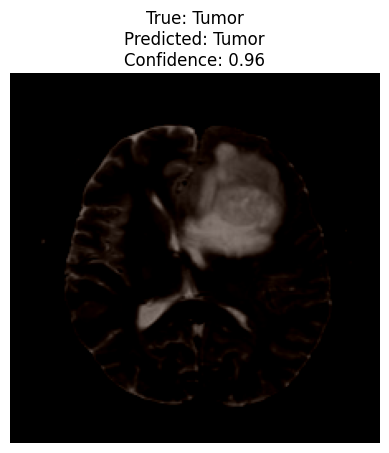

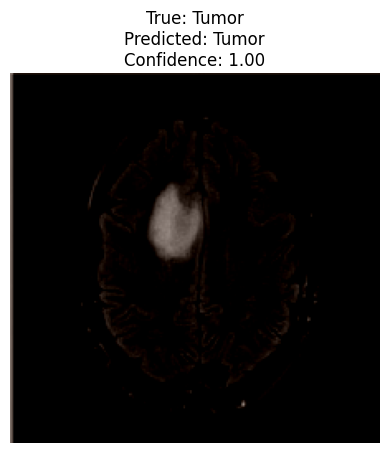

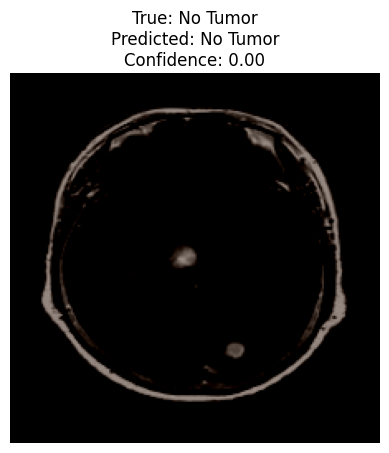

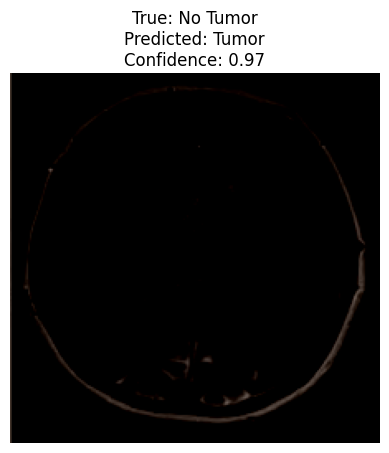

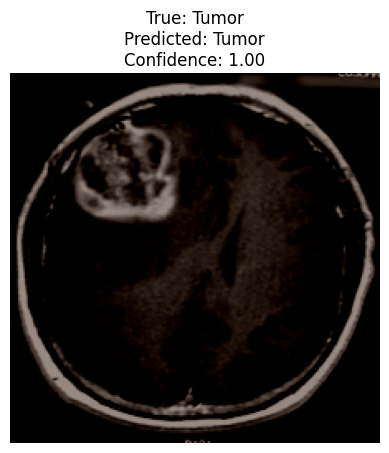

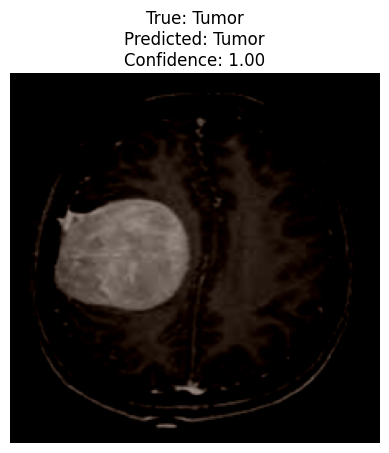

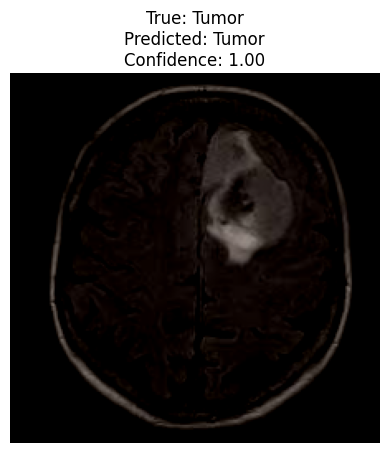

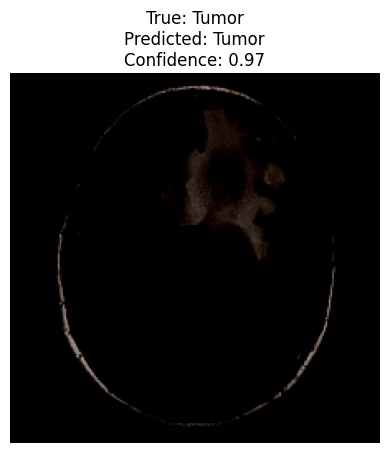

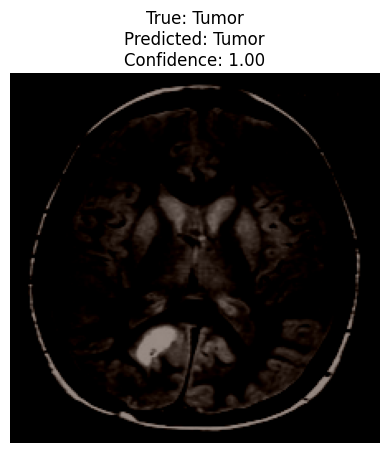

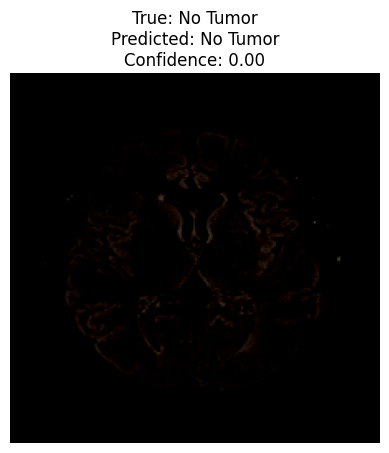

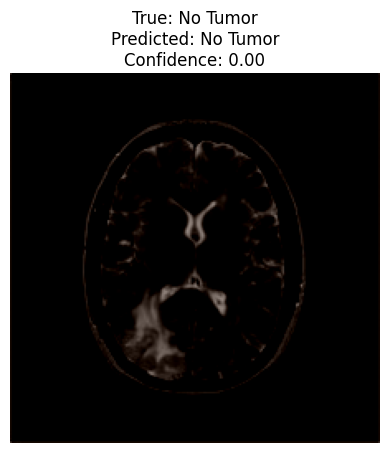

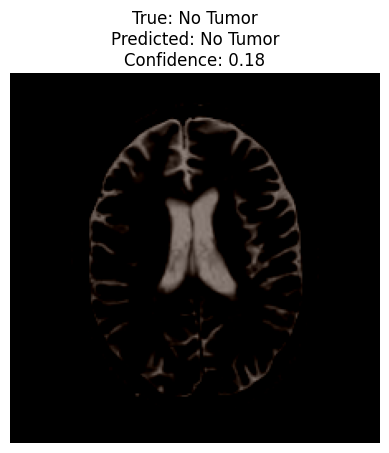

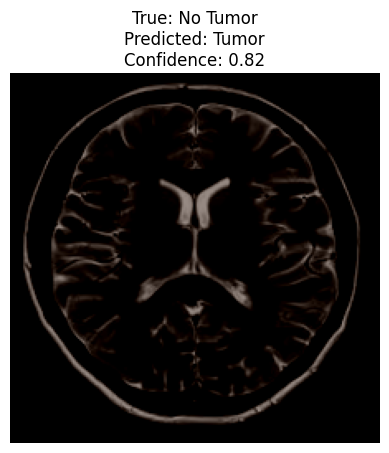

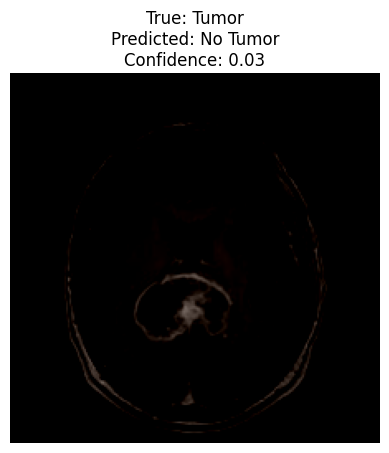

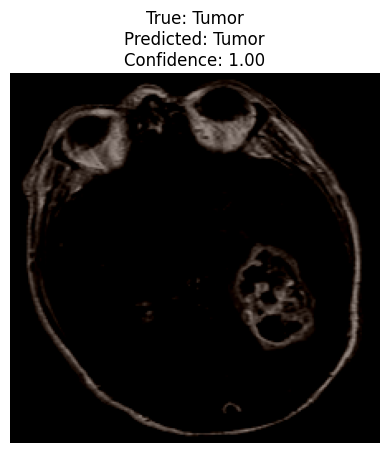

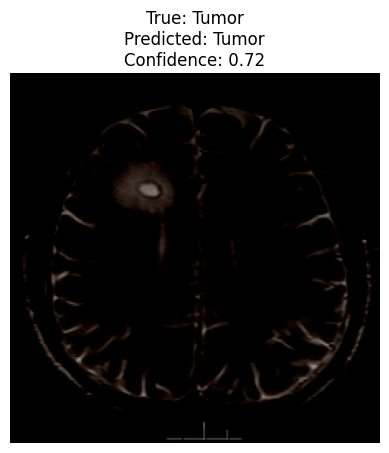

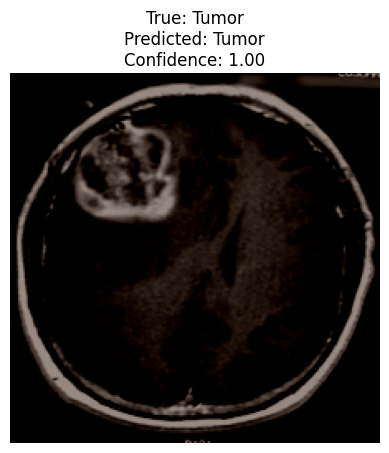

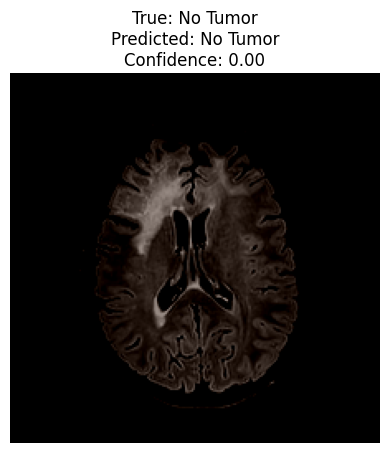

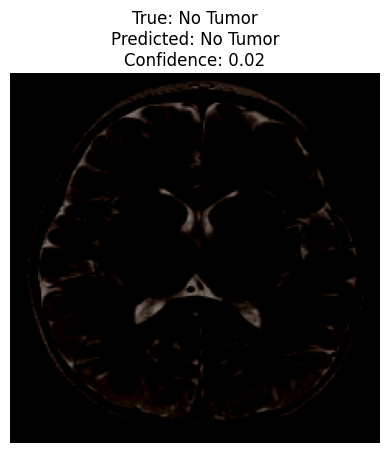

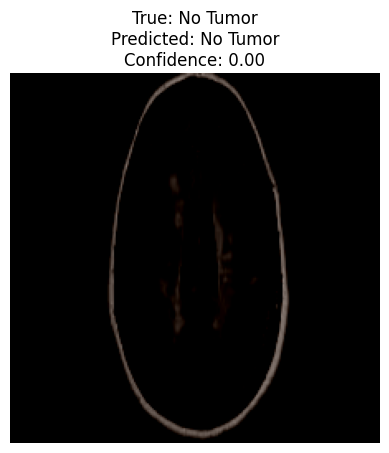

In [14]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(len(x_test)):
    image = x_test[i]
    true_label = y_test[i]
    predicted_label = predicted_labels[i]
    predicted_probability = predictions[i]

    plt.imshow(image)
    plt.title(f"True: {'Tumor' if true_label == 1 else 'No Tumor'}\n"
              f"Predicted: {'Tumor' if predicted_label == 1 else 'No Tumor'}\n"
              f"Confidence: {predicted_probability[0]:.2f}")
    plt.axis('off')  # Turn off axis labels
    plt.show()
